<a href="https://colab.research.google.com/github/dsogden/NLP-Specialization/blob/main/Chap1_W1_Preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import nltk
from nltk.corpus import twitter_samples
import matplotlib.pyplot as plt
import random

In [2]:
nltk.download('twitter_samples')
all_positive_tweets = twitter_samples.strings('positive_tweets.json')
all_negative_tweets = twitter_samples.strings('negative_tweets.json')

[nltk_data] Downloading package twitter_samples to /root/nltk_data...
[nltk_data]   Unzipping corpora/twitter_samples.zip.


In [3]:
print(f'Number of positive tweets: {len(all_positive_tweets)}')
print(f'Number of negative tweets: {len(all_negative_tweets)}')

Number of positive tweets: 5000
Number of negative tweets: 5000


In [4]:
print(f'Type of positive tweets: {type(all_positive_tweets)}')
print(f'Type of a tweet entry is: {type(all_positive_tweets[0])}')

Type of positive tweets: <class 'list'>
Type of a tweet entry is: <class 'str'>


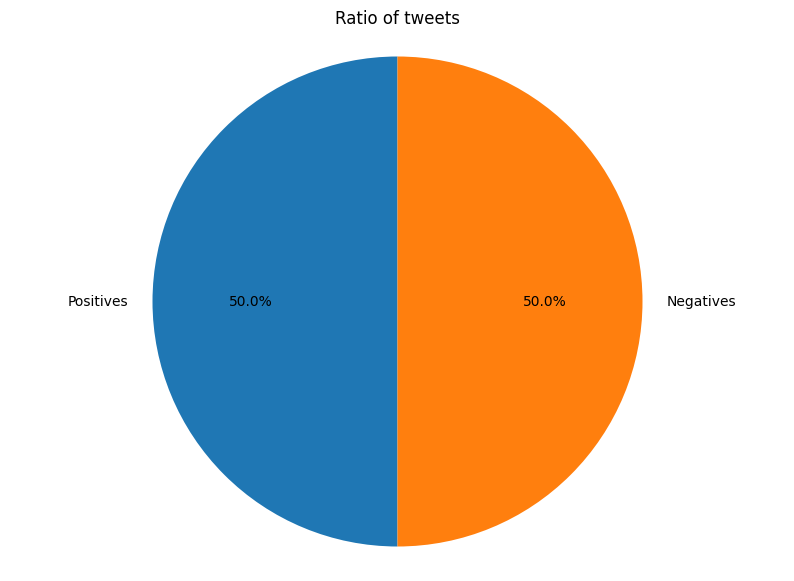

In [6]:
fig, ax = plt.subplots(figsize=(10, 7))
labels = 'Positives', 'Negatives'
sizes = [len(all_positive_tweets), len(all_negative_tweets)]
ax.pie(
    sizes, labels=labels, autopct='%1.1f%%', shadow=False, startangle=90
)
ax.set(
    title='Ratio of tweets'
)
ax.axis('equal')
plt.show()

### Looking at raw texts

In [8]:
print(f'\033[92m {all_positive_tweets[random.randint(0,5000)]}')
print(f'\033[91m {all_negative_tweets[random.randint(0,5000)]}')

 @SBS_MTV #다쇼 #GOT7  

Let's have got7 facts :)
 im sorry im getting all personal and stuff but its really bothering me and i cant stop crying about it but i dont have anyone to talk to :(


### Preprocess raw text for sentiment analysis

In [9]:
tweet = all_positive_tweets[2277]
print(tweet)

My beautiful sunflowers on a sunny Friday morning off :) #sunflowers #favourites #happy #Friday off… https://t.co/3tfYom0N1i


In [10]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [11]:
import re
import string

from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import TweetTokenizer

In [13]:
# Remove hyperlinks, twitter marks and styles
print(f'\033[92m {tweet}')
print(f'\033[94m')

# remove old style retweet text 'RT
tweet2 = re.sub(r'^RT[\s]+', '', tweet)

# remove hyperlinks
tweet2 = re.sub(r'https?://[^\s\n\r]+', '', tweet2)

# remove hashtags
tweet2 = re.sub(r'#', '', tweet2)

print(tweet2)

 My beautiful sunflowers on a sunny Friday morning off :) #sunflowers #favourites #happy #Friday off… https://t.co/3tfYom0N1i

My beautiful sunflowers on a sunny Friday morning off :) sunflowers favourites happy Friday off… 


In [14]:
# Tokenize the string
print()
print('\033[92m' + tweet2)
print('\033[94m')
tokenizer = TweetTokenizer(
    preserve_case=False, strip_handles=True, reduce_len=True
)

tweet_tokens = tokenizer.tokenize(tweet2)
print()
print(f'Tokenized string: {tweet_tokens}')


My beautiful sunflowers on a sunny Friday morning off :) sunflowers favourites happy Friday off… 


Tokenized string: ['my', 'beautiful', 'sunflowers', 'on', 'a', 'sunny', 'friday', 'morning', 'off', ':)', 'sunflowers', 'favourites', 'happy', 'friday', 'off', '…']


In [15]:
# Remove the stop words and punctuations
stopwords_english = stopwords.words('english')
print(f'Stop words {stopwords_english}')
print(f'\nPunctuation: {string.punctuation}')

Stop words ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so'

In [17]:
print()
print('\033[92m')
print(tweet_tokens)
print('\033[94m')

tweets_clean = []
for word in tweet_tokens:
    if (word not in stopwords_english) and (word not in string.punctuation):
        tweets_clean.append(word)
print(f'Removed the stopwords and punctuation: {tweets_clean}')



['my', 'beautiful', 'sunflowers', 'on', 'a', 'sunny', 'friday', 'morning', 'off', ':)', 'sunflowers', 'favourites', 'happy', 'friday', 'off', '…']

Removed the stopwords and punctuation: ['beautiful', 'sunflowers', 'sunny', 'friday', 'morning', ':)', 'sunflowers', 'favourites', 'happy', 'friday', '…']


In [18]:
# stemming
print()
print('\033[92m')
print(tweets_clean)
print('\033[94m')

stemmer = PorterStemmer()
tweets_stem = []

for word in tweets_clean:
    stem_word = stemmer.stem(word)
    tweets_stem.append(stem_word)
print(f'Stemmed words: {tweets_stem}')



['beautiful', 'sunflowers', 'sunny', 'friday', 'morning', ':)', 'sunflowers', 'favourites', 'happy', 'friday', '…']

Stemmed words: ['beauti', 'sunflow', 'sunni', 'friday', 'morn', ':)', 'sunflow', 'favourit', 'happi', 'friday', '…']


In [19]:
! pip install utils

  Preparing metadata (setup.py) ... done
  Created wheel for utils: filename=utils-1.0.2-py2.py3-none-any.whl size=13906 sha256=312781f5d4c01db084a82add5d058b1a8f392d1755594bfc36b9d7d5bdd238d5
  Stored in directory: /root/.cache/pip/wheels/b8/39/f5/9d0ca31dba85773ececf0a7f5469f18810e1c8a8ed9da28ca7
Successfully built utils
